# Analysis of Current Signal Post-capacitor Installation

In [1]:
import altair as alt
import numpy as np
import pandas as pd

from src.data_processing import clean_camonitored_data, calibrate_data, flatten_data, time_period
from src.vizualization import generate_stability_rules, generate_line_chart

# Render altair charts correctly
alt.renderers.enable('notebook')

# Store the altair char json separately and not in the notebook 
# to reduce notebook size
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

## Load in an clean the current data

First we load in roughly 10 minutes of current data without any sparks and then clean and calibrate the data.

In [2]:
data = pd.read_csv(os.path.join(os.getcwd(), "..", "data", "raw", "2018-11-09-current-data.txt"), 
                   delim_whitespace=True, header=None, nrows=600)
data = clean_camonitored_data(data)
data.head()

,Datetime,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,2018-11-09 10:46:49.991566,0.004414,0.005046,0.001571,0.006625,0.004730,0.007888,0.003151,0.004414,0.001571,...,0.000308,0.007888,-0.002219,0.009152,-0.000956,0.011047,-0.003798,0.008520,-0.000640,0.010415
1,2018-11-09 10:46:49.991566,0.004414,0.005046,0.001571,0.006625,0.004730,0.007888,0.003151,0.004414,0.001571,...,0.000308,0.007888,-0.002219,0.009152,-0.000956,0.011047,-0.003798,0.008520,-0.000640,0.010415
2,2018-11-09 10:46:51.171747,-0.000640,0.009468,-0.000640,0.009784,-0.000640,0.009152,-0.001272,0.009784,-0.000008,...,-0.003798,0.010731,-0.003798,0.009468,-0.007589,0.009784,-0.003483,0.008836,-0.006325,0.010099
3,2018-11-09 10:46:52.363062,-0.005378,0.005993,-0.007905,0.008204,-0.008536,0.010099,-0.006641,0.008204,-0.007273,...,-0.006009,0.004098,-0.006957,0.004730,-0.002219,0.003782,-0.006641,0.004098,-0.003167,0.003782
4,2018-11-09 10:46:53.543171,0.001255,-0.001903,-0.003167,-0.000640,0.000624,-0.000956,0.000624,0.000624,0.001255,...,0.000939,0.002203,-0.001587,0.000939,-0.002535,0.000308,-0.001272,-0.000956,-0.001587,-0.000008


In [3]:
CURRENT_CALIBRATION_SCALE_FACTOR = 0.25
calibrated_data = calibrate_data(data, CURRENT_CALIBRATION_SCALE_FACTOR)
calibrated_data.head()

,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,Datetime
0,0.001103,0.001261,0.000393,0.001656,0.001182,0.001972,0.000788,0.001103,0.000393,0.001735,...,0.001972,-0.000555,0.002288,-0.000239,0.002762,-0.000950,0.002130,-0.000160,0.002604,2018-11-09 10:46:49.991566
1,-0.000160,0.002367,-0.000160,0.002446,-0.000160,0.002288,-0.000318,0.002446,-0.000002,0.002367,...,0.002683,-0.000950,0.002367,-0.001897,0.002446,-0.000871,0.002209,-0.001581,0.002525,2018-11-09 10:46:51.171747
2,-0.001344,0.001498,-0.001976,0.002051,-0.002134,0.002525,-0.001660,0.002051,-0.001818,0.001735,...,0.001025,-0.001739,0.001182,-0.000555,0.000946,-0.001660,0.001025,-0.000792,0.000946,2018-11-09 10:46:52.363062
3,0.000314,-0.000476,-0.000792,-0.000160,0.000156,-0.000239,0.000156,0.000156,0.000314,-0.000081,...,0.000551,-0.000397,0.000235,-0.000634,0.000077,-0.000318,-0.000239,-0.000397,-0.000002,2018-11-09 10:46:53.543171
4,-0.000239,0.000235,-0.000555,0.000077,-0.000871,0.000946,-0.000318,0.000235,-0.000555,0.000472,...,0.000077,0.000709,-0.000239,0.000314,-0.000160,-0.000081,0.000472,0.000393,0.000156,2018-11-09 10:46:54.713090


In [4]:
calibrated_data.shape

(599, 101)

## Plotting the raw data

Now we flatten the raw data before plotting it.

In [5]:
flatten_raw_data = flatten_data(calibrated_data)
flatten_raw_data.shape

(59800, 2)

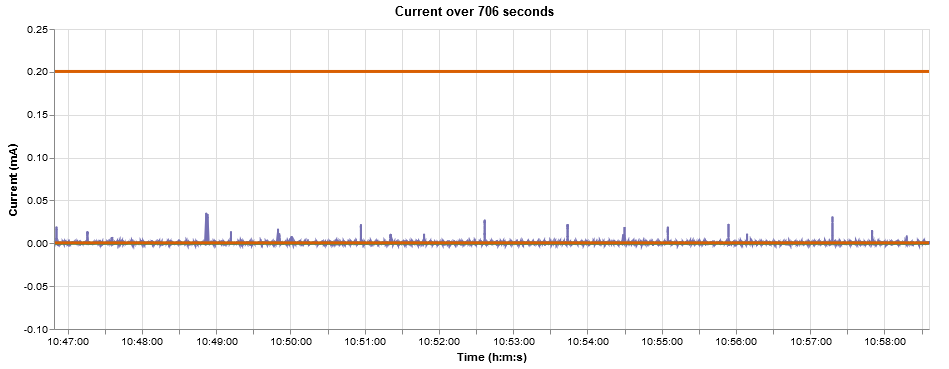

In [6]:
stability_rules_layer = generate_stability_rules(flatten_raw_data, mean=0, low_limit=0, high_limit=0.2)

base_line = generate_line_chart(x_title="Time (h:m:s)", y_title="Current (mA)", 
                                y_scale=(-0.1,0.21), time_unit="hoursminutesseconds")

alt.layer(base_line, stability_rules_layer, data=flatten_raw_data,
          title="Current over {} seconds".format(time_period(flatten_raw_data)),
          width=875,
          config={"background": "white"}
)

In [7]:
np.std(flatten_raw_data)

Value    0.001443
dtype: float64

In [8]:
np.mean(flatten_raw_data)

Value    0.00046
dtype: float64

As you can see, the data does not need any filtering and stays comfortably within the stability bound of 0.2mA.